In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from predict import mydynamo

In [98]:
def select_by_filed(X, key, value, index,dropKey=False):
    X_new = X.loc[X[key] == value]
    if dropKey :
        X_new = X_new.drop([key], axis=1)
        X_new = X_new.set_index([index])
    else:
        X_new = X_new.set_index([index])
            
    return X_new
    

In [99]:
#REMOVE OULIERS
X = pd.read_csv('data/export-hs4-pivot.csv')
obs = pd.read_csv('countries.csv')
obs = obs.set_index(['name'])

df_list = []
year_list = [2019,2018,2017]
for year in year_list :    
    #X_new => 2XXX
    X_temp = select_by_filed(X, 'year_at', year, 'exporter')    
    df_list.append(X_temp)
    
for year in year_list :    
    obs_temp = obs_temp.copy()
    obs_temp['year_at'] = year
    df_list.append(obs_temp)
    
[X_answer, X_new, X_old, obs_answer, obs_new, obs_old] = mydynamo.removeOutlier(df_list)
    
# obs
# X_all = pd.concat(X_list)
# obs_all = pd.concat(obs_list);

# var
var = pd.DataFrame(np.array(X.columns)[2:], columns=['hscode'])
var = var.set_index('hscode')
# var

In [100]:
mydynamo.config()

package anndata colorcet       cvxopt dynamo-release hdbscan loompy  \
version   0.7.5    2.0.2  1.2.5.post1         0.95.2  0.8.26  3.0.6   

package matplotlib   numba numdifftools   numpy pandas pynndescent  \
version      3.3.3  0.52.0       0.9.39  1.19.3  1.2.0       0.5.1   

package python-igraph scikit-learn  scipy seaborn setuptools statsmodels  \
version         0.8.3       0.24.0  1.6.0  0.11.1     49.2.1      0.12.1   

package    tqdm      trimap umap-learn  
version  4.56.0  1.4.3.dev1      0.4.6

In [ ]:
# RESET & SET INDEX
X_answer = X_answer.reset_index().set_index(['exporter','year_at'])
X_new = X_new.reset_index().set_index(['exporter','year_at'])
X_old = X_old.reset_index().set_index(['exporter','year_at'])
obs_answer = obs_answer.reset_index()
obs_new = obs_new.reset_index()
obs_old = obs_old.reset_index()


In [56]:
adata = mydynamo.createAnnotationData(X_all, X_all, obs_all, var)
adata

AnnData object with n_obs × n_vars = 0 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'name', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'year_at'
    layers: 'spliced', 'unspliced'

In [57]:
mydynamo.dynamoProcess(adata)

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 600x400 with 0 Axes>

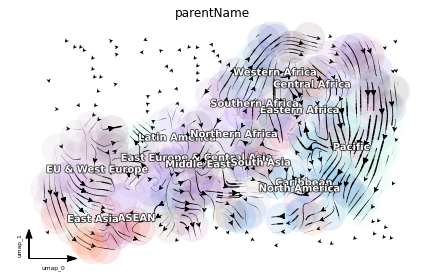

In [7]:
mydynamo.dynamoPlot(adata,'parentName')

<Figure size 1200x800 with 0 Axes>

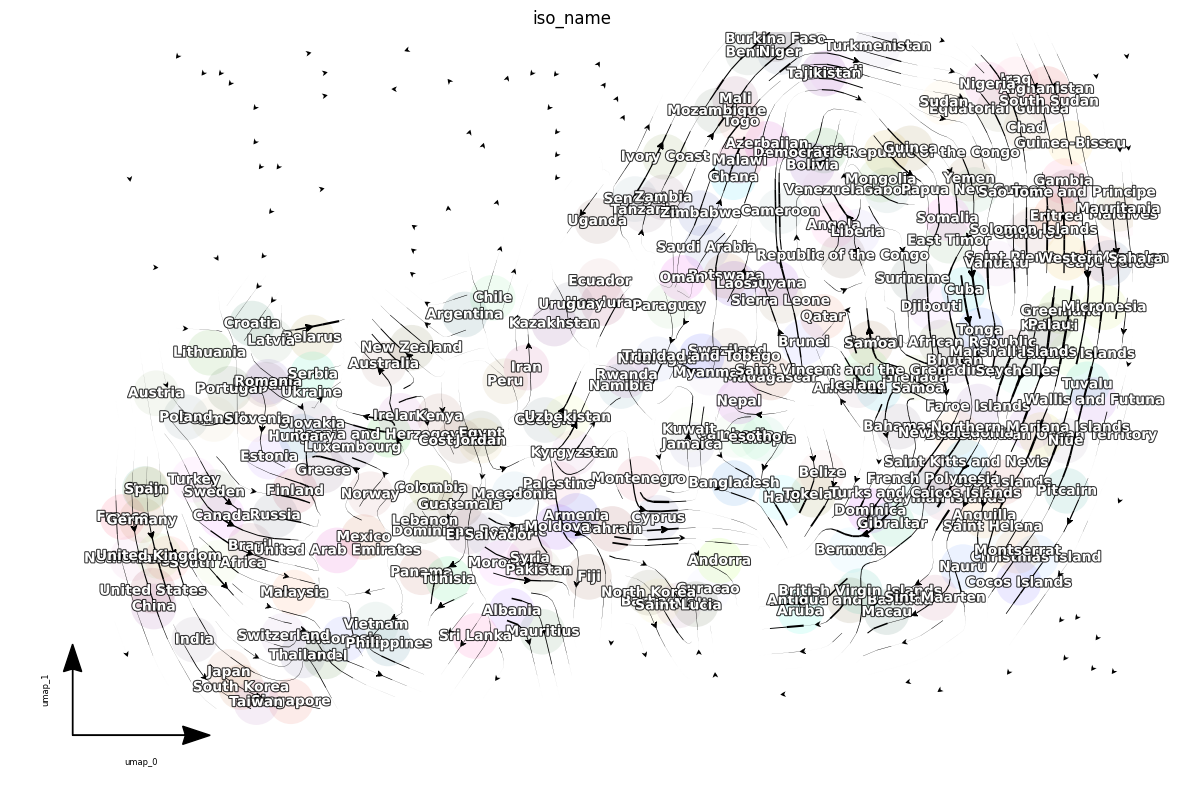

In [31]:
mydynamo.dynamoLargePlot(adata,'iso_name')

In [85]:
adata3 = mydynamo.createVectorField(adata)
adata3

Prepare to Create Vector Field


AnnData expects .obs.index to contain strings, but your first indices are: Index([('latest', 'Afghanistan'), ('latest', 'Albania')], dtype='object'), …
AnnData expects .obs.index to contain strings, but your first indices are: Index([('latest', 'Afghanistan'), ('latest', 'Albania')], dtype='object'), …
calculating transition matrix via pearson kernel with sqrt transform.: 100%|█| 
projecting velocity vector to low dimensional embedding...: 100%|█| 438/438 [00


Create Vector Field ...


AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities', 'distances', 'pearson_trans

<Figure size 600x400 with 0 Axes>

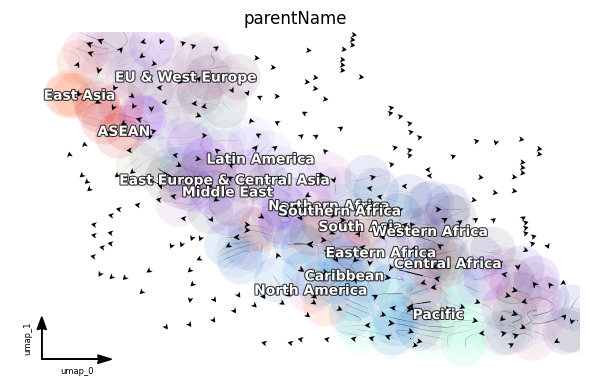

In [86]:
mydynamo.dynamoPlot(adata3,'parentName')

<Figure size 1200x800 with 0 Axes>

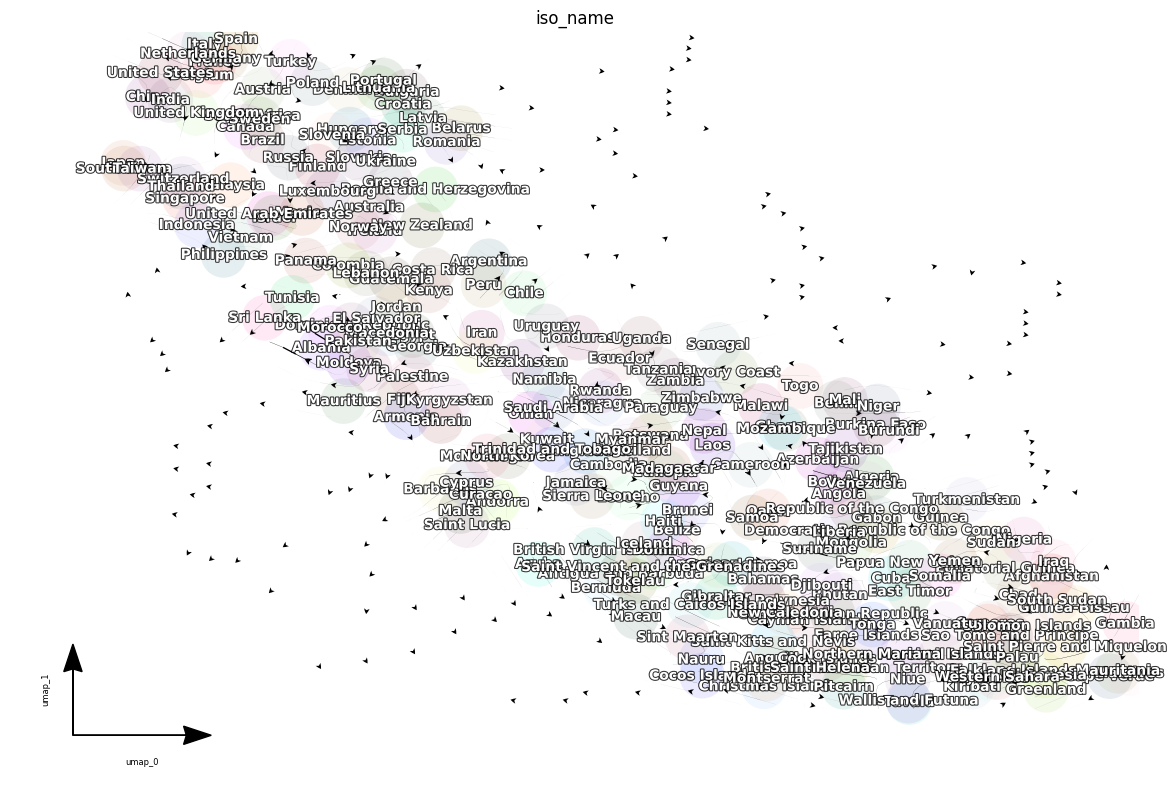

In [87]:
mydynamo.dynamoLargePlot(adata3,'iso_name')

In [89]:
adata4 = mydynamo.knnToVectorField(adata3)
adata4

KNN


AnnData object with n_obs × n_vars = 219 × 1258
    obs: 'id', 'created_at', 'updated_at', 'code', 'iso_code', 'iso_name', 'parentCode', 'parentName', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities', 'distances', 'pearson_trans

<Figure size 600x400 with 0 Axes>

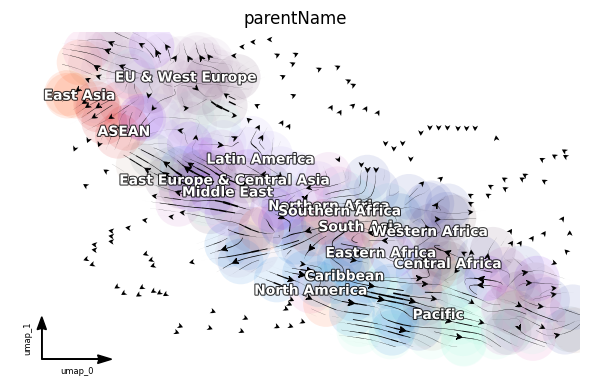

In [90]:
mydynamo.dynamoPlot(adata4,'parentName')

<Figure size 1200x800 with 0 Axes>

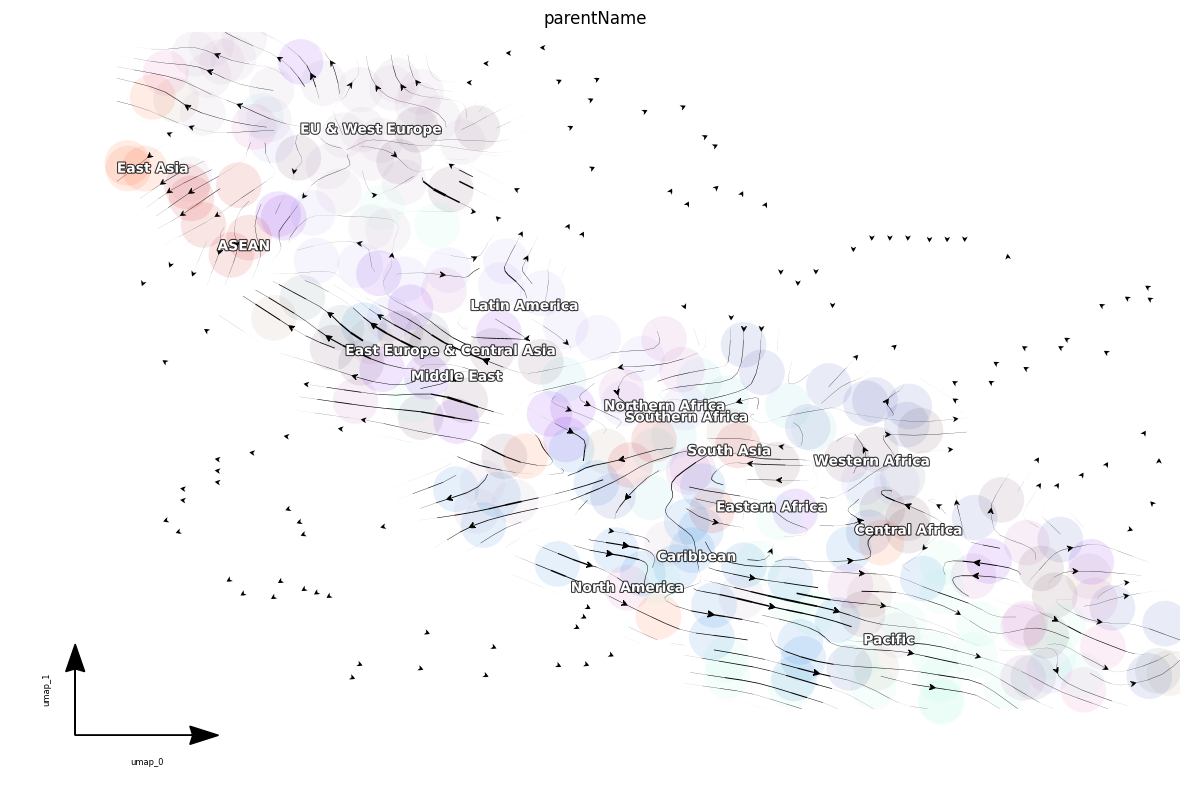

In [91]:
mydynamo.dynamoLargePlot(adata4,'parentName')

<Figure size 1200x800 with 0 Axes>

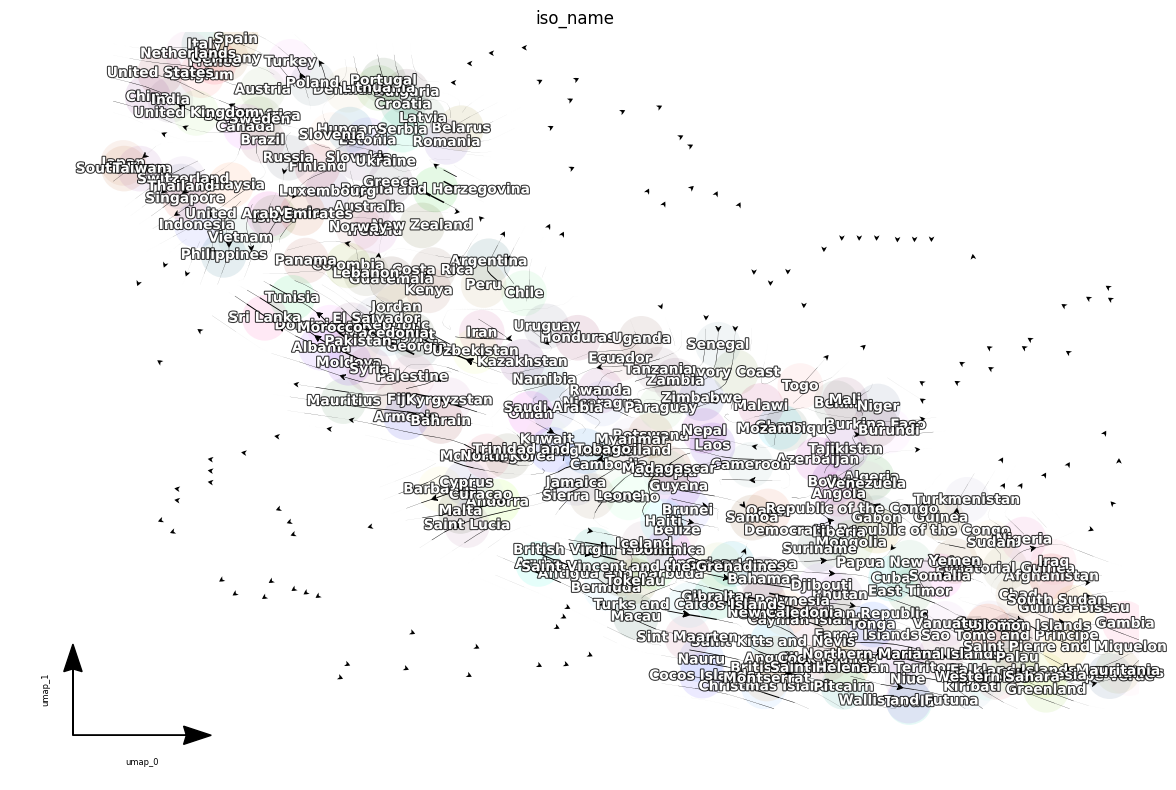

In [92]:
mydynamo.dynamoLargePlot(adata4,'iso_name')

In [93]:
temp_adata = adata4.copy()
temp_adata.obs

id           created_at           updated_at  \
name                                                                       
Afghanistan                  1  2021-01-06 05:28:44  2021-01-06 05:28:44   
Albania                      2  2021-01-06 05:28:45  2021-01-06 05:28:45   
Algeria                      3  2021-01-06 05:28:45  2021-01-06 05:28:45   
American Samoa               4  2021-01-06 05:28:45  2021-01-06 05:28:45   
Andorra                      5  2021-01-06 05:28:45  2021-01-06 05:28:45   
...                        ...                  ...                  ...   
Wallis and Futuna Islands  218  2021-01-06 05:29:04  2021-01-06 05:29:04   
Western Sahara             219  2021-01-06 05:29:04  2021-01-06 05:29:04   
Yemen                      220  2021-01-06 05:29:05  2021-01-06 05:29:05   
Zambia                     221  2021-01-06 05:29:05  2021-01-06 05:29:05   
Zimbabwe                   222  2021-01-06 05:29:05  2021-01-06 05:29:05   

                           code iso_code           iso_name  parentCode  \
name                                                                      
Afghanistan                   4       AF        Afghanistan          13   
Albania                       8       AL            Albania           6   
Algeria                      12       DZ            Algeria          11   
American Samoa               16       AS     American Samoa          12   
Andorra                      20       AD            Andorra           4   
...                         ...      ...                ...         ...   
Wallis and Futuna Islands   876       WF  Wallis and Futuna          12   
Western Sahara              732       EH     Western Sahara          11   
Yemen                       887       YE              Yemen           9   
Zambia                      894       ZM             Zambia          14   
Zimbabwe                    716       ZW           Zimbabwe          14   

                                           parentName  nGenes     nCounts  \
name                                                                        
Afghanistan                                South Asia     104    863827.0   
Albania                    East Europe & Central Asia     762   2819337.0   
Algeria                               Northern Africa     621  36803356.0   
American Samoa                                Pacific     169      2473.0   
Andorra                              EU & West Europe     443    114366.0   
...                                               ...     ...         ...   
Wallis and Futuna Islands                     Pacific      47      2043.0   
Western Sahara                        Northern Africa      44      3280.0   
Yemen                                     Middle East     277   1569368.0   
Zambia                                Southern Africa     704   6962491.0   
Zimbabwe                              Southern Africa     546   4279376.0   

                           pMito  use_for_pca  Size_Factor  initial_cell_size  \
name                                                                            
Afghanistan                  0.0         True     0.174635           863827.0   
Albania                      0.0         True     0.569969          2819337.0   
Algeria                      0.0         True     7.440324         36803376.0   
American Samoa               0.0         True     0.000500             2473.0   
Andorra                      0.0         True     0.023121           114366.0   
...                          ...          ...          ...                ...   
Wallis and Futuna Islands    0.0         True     0.000413             2043.0   
Western Sahara               0.0         True     0.000663             3280.0   
Yemen                        0.0         True     0.317270          1569368.0   
Zambia                       0.0         True     1.407566          6962491.0   
Zimbabwe                     0.0         True     0.865137          4279376.0   

       

In [94]:
temp_adata.obs['parentName'].drop_duplicates().to_numpy()

array(['South Asia', 'East Europe & Central Asia', 'Northern Africa',
       'Pacific', 'EU & West Europe', 'Southern Africa', 'Caribbean',
       'Latin America', 'Middle East', 'Western Africa', 'North America',
       'ASEAN', 'Central Africa', 'East Asia', 'Eastern Africa'],
      dtype=object)

<Figure size 600x400 with 0 Axes>

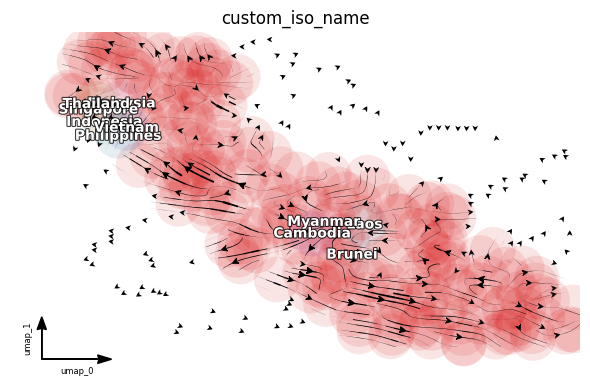

In [95]:
# temp_adata.obs['region'] = temp_adata.obs['parentName'] 
# temp_adata.obs['region'] = temp_adata.obs.apply(lambda x: x.iso_name*(x.region=='ASEAN'), axis=1)
mydynamo.dynamoPlot(temp_adata,'iso_name', 'parentName',["ASEAN"])

<Figure size 1200x800 with 0 Axes>

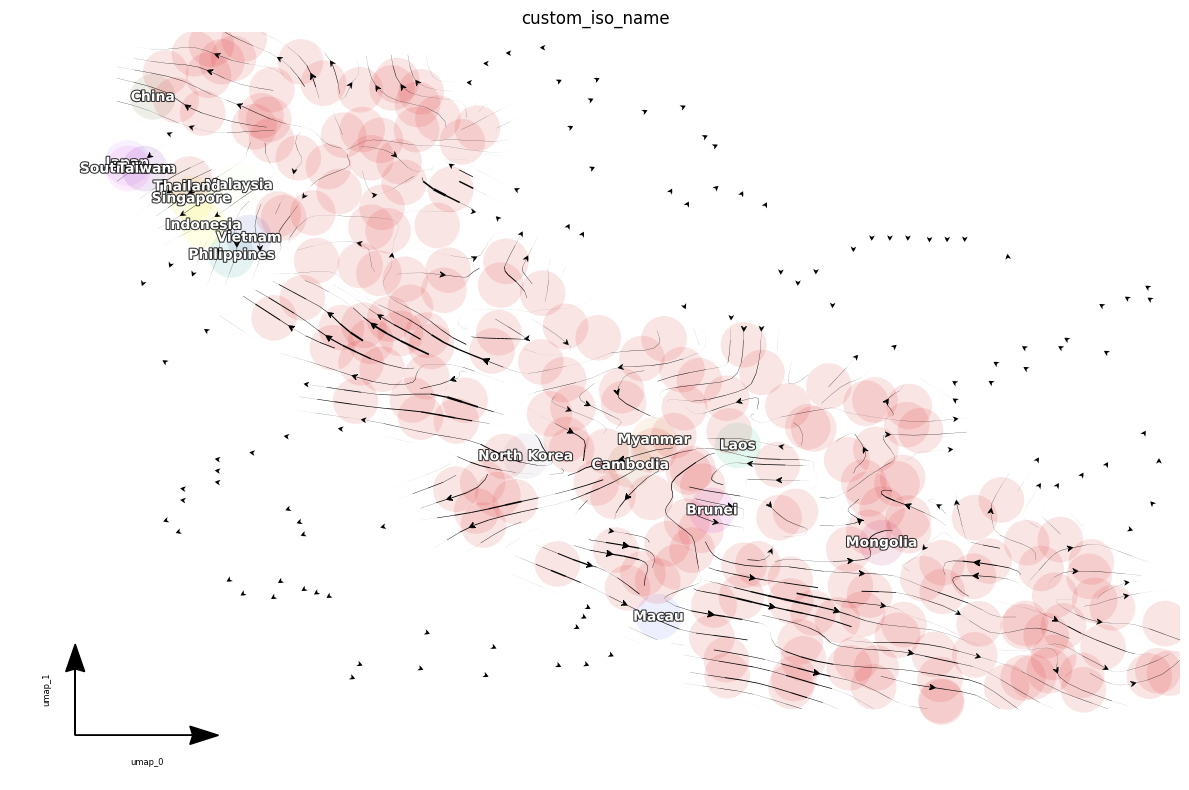

In [96]:
mydynamo.dynamoLargePlot(temp_adata,'iso_name', 'parentName',["ASEAN","East Asia"])

In [97]:
neighbors = adata.uns['neighbors']['indices']
neighbors[:,0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [98]:
adata.obsm['X_umap']

array([[20.810493 ,  8.345956 ],
       [13.816122 ,  4.9710674],
       [17.9009   ,  7.9477153],
       [18.615032 ,  6.4101987],
       [16.532757 ,  5.2951875],
       [18.025444 ,  7.4655046],
       [19.9936   ,  5.5877914],
       [18.237827 ,  5.0396986],
       [13.199149 ,  6.887771 ],
       [14.65951  ,  5.5851955],
       [17.590342 ,  4.9694505],
       [12.141585 ,  6.567634 ],
       [ 9.16564  ,  6.3783083],
       [17.15166  ,  7.99081  ],
       [18.878778 ,  6.162513 ],
       [15.12816  ,  5.5008154],
       [16.722633 ,  5.797192 ],
       [15.725028 ,  5.032394 ],
       [11.200309 ,  6.738387 ],
       [ 9.315994 ,  5.3091106],
       [17.873032 ,  5.8640203],
       [16.901278 ,  8.582017 ],
       [18.245295 ,  5.3636923],
       [19.60851  ,  6.5885816],
       [17.74537  ,  7.851839 ],
       [12.204522 ,  6.1103897],
       [16.620943 ,  7.138423 ],
       [10.392424 ,  5.391711 ],
       [20.741829 ,  6.1085033],
       [18.366611 ,  5.0981717],
       [17

Afghanistan Iraq
Albania Pakistan
Algeria Venezuela, Bolivarian Republic of
American Samoa Grenada
Andorra Curaçao
Angola Bolivia, Plurinational State of
Anguilla Saint Kitts and Nevis
Antigua and Barbuda Tokelau
Argentina Peru
Armenia Fiji
Aruba British Virgin Islands
Australia Norway
Austria Poland
Azerbaijan Tajikistan
Bahamas French Polynesia
Bahrain Armenia
Bangladesh Trinidad and Tobago
Barbados Cyprus
Belarus Romania
Belgium France
Belize Haiti
Benin Mali
Bermuda Antigua and Barbuda
Bhutan Djibouti
Bolivia, Plurinational State of Angola
Bosnia and Herzegovina Greece
Botswana Myanmar
Brazil Canada
British Indian Ocean Territory Saint Helena
British Virgin Islands Iceland
Brunei Darussalam Haiti
Bulgaria Croatia
Burkina Faso Burundi
Burundi Burkina Faso
Cabo Verde Mauritania
Cambodia Bangladesh
Cameroon Lao People's Democratic Republic
Canada Sweden
Cayman Islands Central African Republic
Central African Republic Cayman Islands
Chad South Sudan
Chile Peru
China India
Christmas Isl

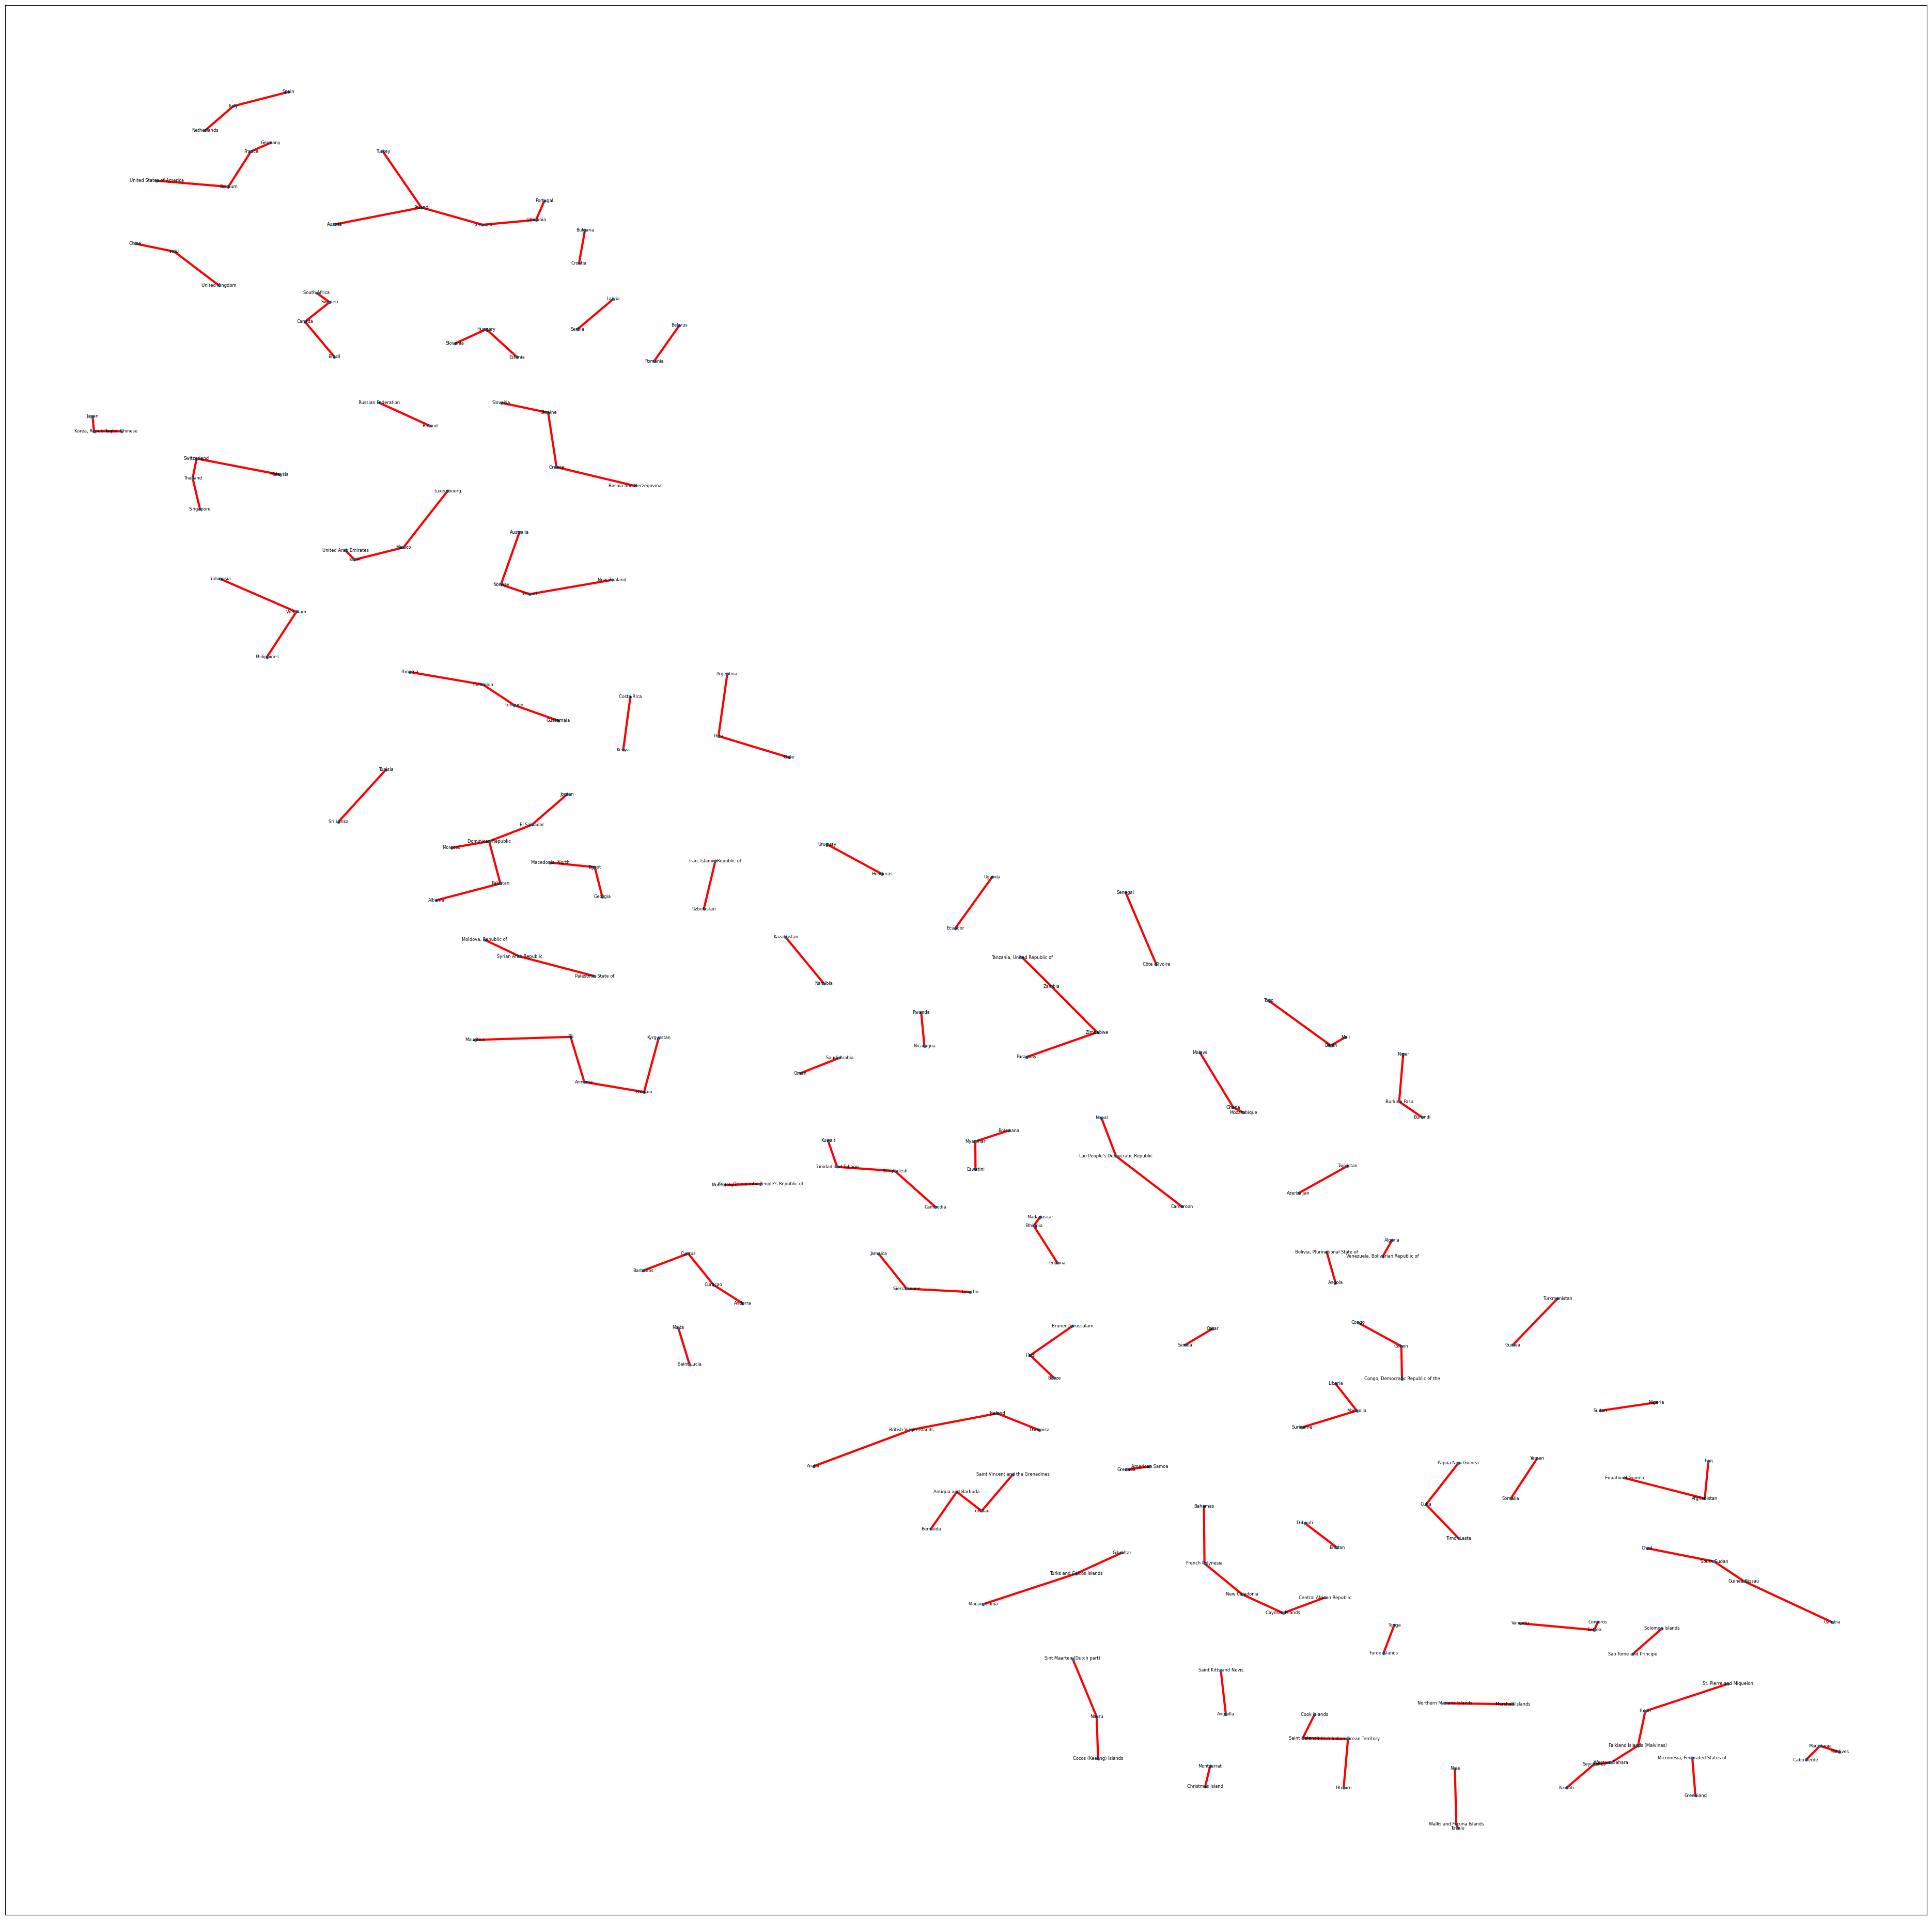

In [123]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(48,48))


#Import adjacency matrix A[i,j]
A = np.matrix([[0, 1, 1, 0, 0, 1, 0],
               [0, 0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 1, 1, 0],
               [0, 0, 0, 0, 1, 1, 0],
               [0, 0, 0, 0, 0, 0, 1], 
               [0, 0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0, 0]])
A = np.zeros((219,219))
countries = adata4.obs.index.to_numpy()
for i in range( len(adata4.uns['neighbors']['indices']) ): 
    max_dist = 100
    nearest_j = i
    for j in range( len(adata4.obsm['X_umap']) ):
#         if i==j: 
#             continue         
#         dist = sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
        x2 = adata4.obsm['X_umap'][i][0]
        x1 = adata4.obsm['X_umap'][j][0]
        y2 = adata4.obsm['X_umap'][i][1]
        y1 = adata4.obsm['X_umap'][j][1]
        dist = sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
        if dist < max_dist and dist != 0 :
            max_dist = dist
            nearest_j = j
    adata4.uns['neighbors']['indices'][i][1] = nearest_j
    adata4.uns['neighbors']['indices'][i][0] = i
    print(countries[i], countries[nearest_j])


neighbors = adata4.uns['neighbors']['indices']
nb = neighbors[:,[0,1]]
for item in nb:
#     print(item[0], item[1])
    A[item[0], item[1]] = 1

## Import node coordinates
xy = np.array([[0, 0],
               [-20, 20],
               [17, 27], 
               [-6, 49], 
               [15, 65], 
               [-20, 76],
               [5,  100]]) 

xy = adata4.obsm['X_umap']

# G = nx.from_numpy_matrix(np.array(A), create_using = nx.MultiDiGraph())
# pos = xy
# nx.draw(G,pos)
# labels = {i: i + 1 for i in G.nodes()}
# nx.draw_networkx_labels(G, pos, labels, font_size=15, arrows=True)
## Draw newtwork
G = nx.from_numpy_matrix(A, xy)
# countries = adata4.obs.index.to_numpy()
# labels = {i: countries[i] + str(int(xy[i][0])) +"|" + str(int(xy[i][1])) for i in G.nodes()}
labels = {i: countries[i]  for i in G.nodes()}
nx.draw_networkx(G, pos=xy , width=3, arrows=True, labels=labels,font_size=6,node_size=10,edge_color='r')
# labels = {i: i + 1 for i in G.nodes()}
# nx.draw_networkx_labels(G, pos=xy ,labels=labels, font_size=15)
# plt.figure(3,figsize=(24,24)) 
# plt.figure(num=None, figsize=(500,500), dpi=1, facecolor='w', edgecolor='k')
plt.show()

In [142]:
X2 = pd.read_csv('data/export-hs2-pivot.csv')
#X_new => 2019
X2_new = X2.loc[X2['year_at'] == 2019]
X2_new = X2_new.drop(['year_at'], axis=1)
X2_new = X2_new.set_index(['exporter'])

Text(0.5, 0.98, 'Cluster Analysis : Thailand, Switzerland, Malaysia, and Singapore ')

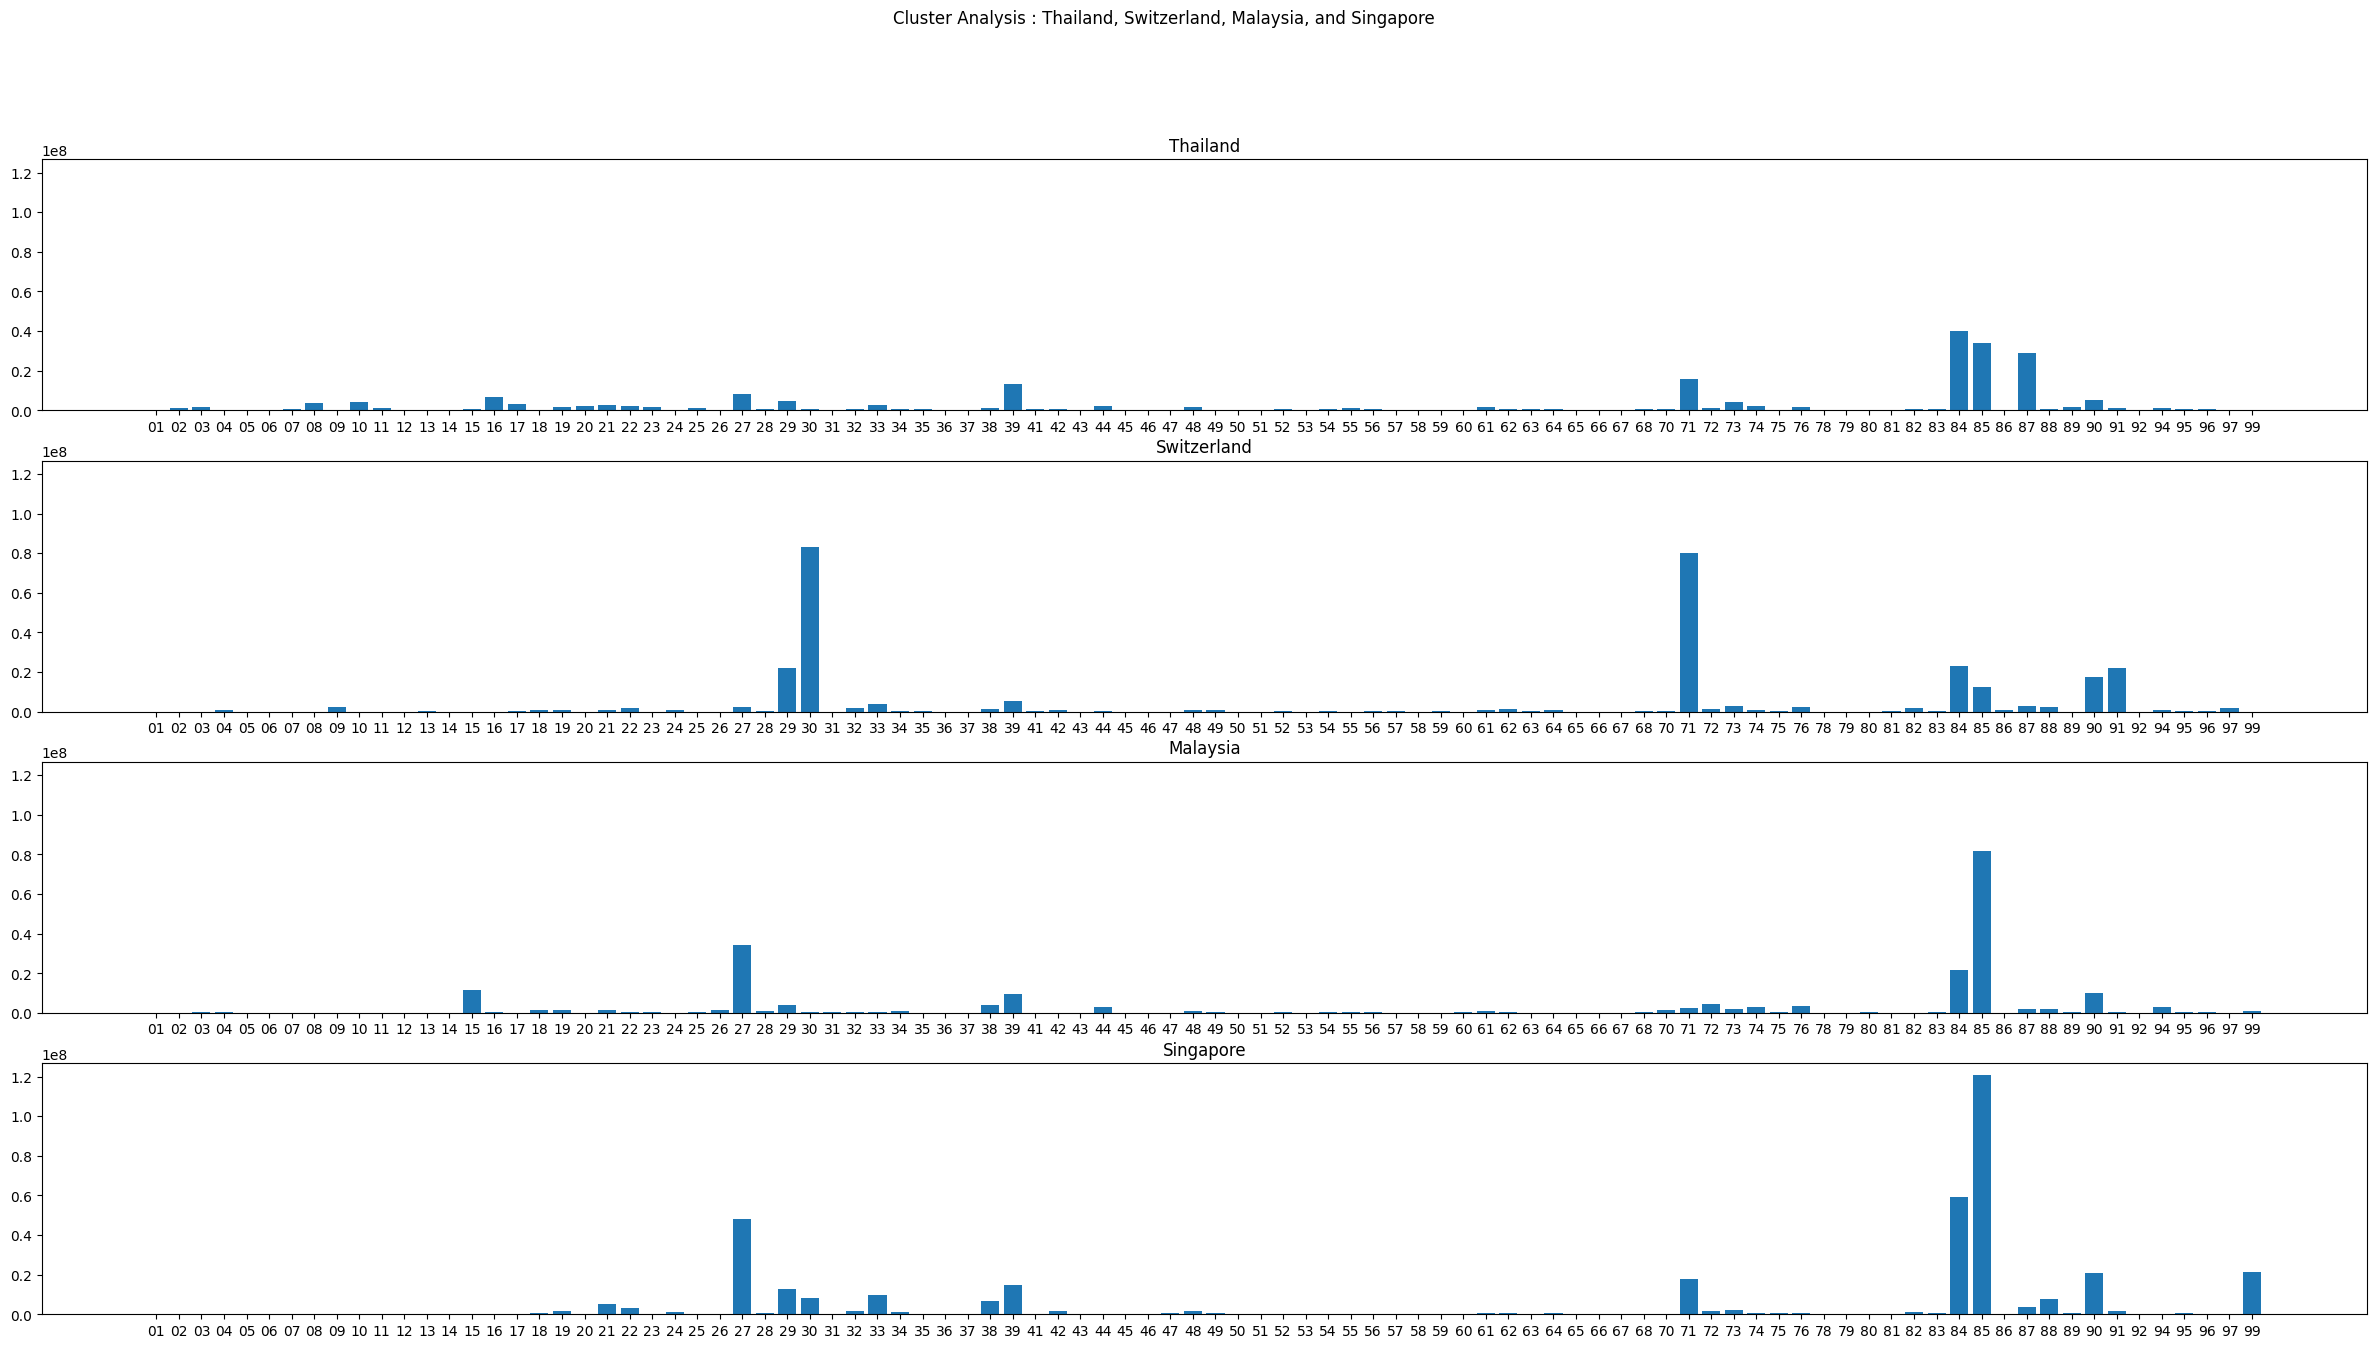

In [156]:
import matplotlib.pyplot as plt
import json

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(4, 1, figsize=(30, 15), sharey=True)
#THAILAND
Thailand = json.loads(X2_new.loc['Thailand'].to_json())
axs[0].set_title('Thailand')
axs[0].bar(list(Thailand.keys()), list(Thailand.values()))


#Switzerland
Switzerland = json.loads(X2_new.loc['Switzerland'].to_json())
axs[1].set_title('Switzerland')
axs[1].bar(list(Switzerland.keys()), list(Switzerland.values()))


#Malaysia
Malaysia = json.loads(X2_new.loc['Malaysia'].to_json())
axs[2].set_title('Malaysia')
axs[2].bar(list(Malaysia.keys()), list(Malaysia.values()))


#Singapore
Singapore = json.loads(X2_new.loc['Singapore'].to_json())
axs[3].set_title('Singapore')
axs[3].bar(list(Singapore.keys()), list(Singapore.values()))

fig.suptitle('Cluster Analysis : Thailand, Switzerland, Malaysia, and Singapore ')

In [139]:
import json

data = json.loads(X_new.loc['Thailand'].to_json())

{'0101': 1532.0,
 '0102': 243802.0,
 '0103': 115062.0,
 '0104': 520.0,
 '0105': 17675.0,
 '0106': 2866.0,
 '0201': 42.0,
 '0202': 434.0,
 '0203': 25140.0,
 '0204': 8.0,
 '0205': 0.0,
 '0206': 5121.0,
 '0207': 810805.0,
 '0208': 1423.0,
 '0209': 93.0,
 '0210': 185364.0,
 '0301': 30582.0,
 '0302': 47303.0,
 '0303': 111437.0,
 '0304': 249463.0,
 '0305': 68142.0,
 '0306': 991033.0,
 '0307': 318968.0,
 '0308': 22772.0,
 '0401': 85516.0,
 '0402': 32697.0,
 '0403': 134959.0,
 '0404': 7201.0,
 '0405': 2106.0,
 '0406': 4657.0,
 '0407': 25445.0,
 '0408': 15706.0,
 '0409': 19823.0,
 '0410': 4578.0,
 '0501': 499.0,
 '0502': 7.0,
 '0503': 0.0,
 '0504': 10321.0,
 '0505': 17814.0,
 '0506': 7103.0,
 '0507': 59.0,
 '0508': 2009.0,
 '0509': 0.0,
 '0510': 144.0,
 '0511': 21746.0,
 '0601': 4182.0,
 '0602': 41346.0,
 '0603': 76301.0,
 '0604': 10737.0,
 '0701': 13.0,
 '0702': 636.0,
 '0703': 10227.0,
 '0704': 3452.0,
 '0705': 406.0,
 '0706': 2097.0,
 '0707': 411.0,
 '0708': 1351.0,
 '0709': 119023.0,
 '0710

In [116]:
nb

array([[  0,  94],
       [217, 148],
       [  2, 212],
       [  3,  82],
       [  4,  53],
       [  5,  24],
       [  6, 164],
       [  7, 196],
       [  8, 154],
       [  9,  70],
       [ 10,  29],
       [ 11, 146],
       [ 12, 157],
       [ 13, 191],
       [ 14,  73],
       [ 15,   9],
       [ 16, 198],
       [ 17,  54],
       [ 18, 160],
       [ 19,  72],
       [ 20,  87],
       [ 21, 121],
       [ 22,   7],
       [ 23,  57],
       [ 24,   5],
       [ 25,  80],
       [ 26, 134],
       [ 27,  37],
       [ 28, 163],
       [ 29,  90],
       [ 30,  87],
       [ 31,  51],
       [ 32,  33],
       [ 33,  32],
       [ 34, 124],
       [ 35,  16],
       [ 36, 108],
       [ 37, 187],
       [ 38,  39],
       [ 39,  38],
       [ 40, 181],
       [ 41, 154],
       [ 42,  91],
       [ 43, 131],
       [ 44, 136],
       [ 45, 110],
       [ 46,  64],
       [ 47,  74],
       [ 48,  74],
       [ 49, 163],
       [ 50, 102],
       [ 51,  31],
       [ 52,

In [48]:
adata4.obs.index.to_numpy()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia, Plurinational State of', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Indian Ocean Territory',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands',
       'Colombia', 'Comoros', 'Congo',
       'Congo, Democratic Republic of the', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', "Côte d'Ivoire", 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',


In [71]:
neighbors = adata4.uns['neighbors']['indices']
nb = neighbors[:,[0,1]]
for item in nb:
    print(item[0], item[1]).
    

0 23
1 116
2 5
3 2
4 53
5 47
6 164
7 175
8 41
9 76
10 115
11 140
12 77
13 2
14 38
15 106
16 35
17 122
18 176
19 138
20 7
21 32
22 7
23 139
24 129
25 116
26 121
27 180
28 144
29 175
30 159
31 171
32 121
33 142
34 120
35 16
36 78
37 187
38 49
39 48
40 181
41 11
42 12
43 163
44 43
45 151
46 168
47 5
48 84
49 38
50 59
51 171
52 139
53 122
54 122
55 78
56 113
57 179
58 6
59 83
60 88
61 8
62 83
63 94
64 85
65 109
66 111
67 16
68 81
69 172
70 15
71 187
72 77
73 139
74 112
75 168
76 9
77 72
78 55
79 38
80 171
81 68
82 166
83 62
84 48
85 181
86 198
87 16
88 141
89 177
90 69
91 12
92 213
93 61
94 181
95 140
96 174
97 72
98 198
99 12
100 110
101 93
102 83
103 127
104 4
105 99
106 159
107 9
108 5
109 65
110 100
111 66
112 74
113 56
114 176
115 175
116 132
117 67
118 32
119 193
120 127
121 142
122 53
123 103
124 120
125 62
126 176
127 103
128 116
129 24
130 1
131 156
132 116
133 21
134 16
135 26
136 163
137 16
138 19
139 49
140 95
141 88
142 121
143 94
144 203
145 149
146 71
147 106
148 132
149 127

In [74]:
neighbors = adata4.uns['neighbors']['indices']
neighbors

array([[  0,  23,  28, ..., 214, 215, 216],
       [  1, 116, 132, ..., 189, 154,  53],
       [  2,   5,  13, ..., 152,  69, 186],
       ...,
       [216, 179, 185, ..., 181,  28,  64],
       [217, 218, 118, ...,   2,  15,  36],
       [218, 217, 118, ..., 106, 191,  60]])

In [75]:
neighbors[0]

array([  0,  23,  28,  34,  40,  46,  63,  64,  68,  75,  84,  85,  94,
       120, 124, 127, 143, 144, 149, 156, 168, 181, 184, 185, 194, 201,
       203, 214, 215, 216])

In [76]:
neighbors[0] > 50

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [79]:
neighbors[0][neighbors[0] > 100]

array([120, 124, 127, 143, 144, 149, 156, 168, 181, 184, 185, 194, 201,
       203, 214, 215, 216])

In [80]:
neighbors)

219